# COVID-19
## Laboratório de estudos de casos do Corona Virus Covid-19 

## Fonte de Dados
Base de dados da [Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)](https://github.com/CSSEGISandData/COVID-19) <br>
Com base nele foi publicado o estudo: <br>

### *An interactive web-based dashboard to track COVID-19 in real time* <br>
DOI:  https://doi.org/10.1016/S1473-3099(20)30120-1 <br>
Painel: https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

Dentre os dados vamos utilizar o "CSSE COVID-19 Dataset" que é atualizado diariamente.<br>
Nele há duas bases de dados
<ul>"Daily Reports"</ul>
<ul>"Time Series"</ul>

Vamos utilizar o Time Series.<br>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importando Dados

In [2]:
dfWorld = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [3]:
dfWorld.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20',
       '7/1/20', '7/2/20', '7/3/20', '7/4/20'],
      dtype='object', length=169)

In [4]:
# Visualizar ultimos 4 elementos:
dfWorld.tail(4)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,272,272,272,272,272,303,303,303,309,309
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,17,24,24,27,27,27,35,35,35,35


### Análise Exploratória:
A análise exploratória é uma fase importantíssima num projeto de análise de dados seja big data, data visualzation ou de data science propriamente dito.
Muitas informações são rascunhadas nessa fase, algumas descobertas podem ser feitas como também insights que de outra maneira não seriam possíveis.


#### Temos Lat/Long, Country/Region e DateTime
Ou seja, podemos fazer um plot por países, localização/distâncias e por séries temporais
ou mesmo, qualquer junção dessas dimensões

In [5]:
# dfWorld.describe
# Describe é muito extenso
# selecioando apenas colunas de data
# qtd = dfWorld.shape[1]

### Dados do Mundo Todo

In [6]:
# convertendo para séries temporais:
tsWorld = np.sum(dfWorld.iloc[ : , 4 : ])
tsWorld.index = pd.DatetimeIndex(tsWorld.index)
tsWorld.tail(3)

2020-07-02    10871926
2020-07-03    11074878
2020-07-04    11267309
dtype: int64

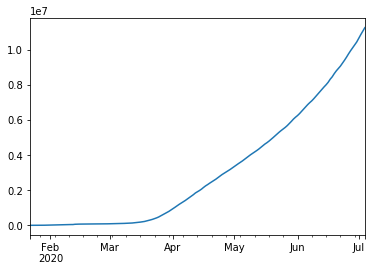

In [7]:
tsWorld.plot()

### Análise do Brasil

In [8]:
dfBr = dfWorld[dfWorld['Country/Region'] == 'Brazil']

In [9]:
dfBr

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,1228114,1274974,1313667,1344143,1368195,1402041,1448753,1496858,1539081,1577004


In [10]:
dfBr.drop(['Province/State','Lat','Long'], axis=1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
28,Brazil,0,0,0,0,0,0,0,0,0,...,1228114,1274974,1313667,1344143,1368195,1402041,1448753,1496858,1539081,1577004


In [11]:
# qtdBr = dfBr.shape[1]
# qtdBr

In [12]:
# Gerando a TimeSeries
tsBr = np.sum(dfBr.iloc[ : , 4 :  ])

In [13]:
tsBr

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/30/20    1402041
7/1/20     1448753
7/2/20     1496858
7/3/20     1539081
7/4/20     1577004
Length: 165, dtype: int64

In [14]:
tsBr.index = pd.DatetimeIndex(tsBr.index)

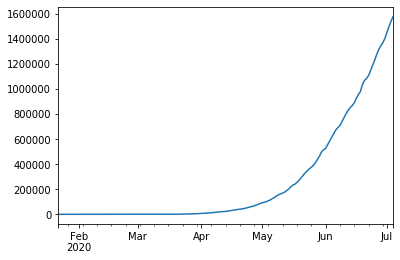

In [15]:
# Comparando os dados:
# plt.plot(index=tsBr.index)
# plt.plot(index=tsWorld.index)
# plt.show
tsBr.plot()

### Comparando Brasil com outros Países

In [16]:
dfUs = dfWorld[dfWorld['Country/Region'] == 'US']
dfCh = dfWorld[dfWorld['Country/Region'] == 'China']
dfIt = dfWorld[dfWorld['Country/Region'] == 'Italy']

In [17]:
dfUs.drop(['Province/State','Lat','Long'], axis=1)
dfCh.drop(['Province/State','Lat','Long'], axis=1)
dfIt.drop(['Province/State','Lat','Long'], axis=1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
137,Italy,0,0,0,0,0,0,0,0,0,...,239706,239961,240136,240310,240436,240578,240760,240961,241184,241419


In [18]:
# Gerando a TimeSeries
tsUs = np.sum(dfUs.iloc[ : , 4 :  ])
tsCh = np.sum(dfCh.iloc[ : , 4 :  ])
tsIt = np.sum(dfIt.iloc[ : , 4 :  ])

tsUs.index = pd.DatetimeIndex(tsUs.index)
tsCh.index = pd.DatetimeIndex(tsCh.index)
tsIt.index = pd.DatetimeIndex(tsIt.index)

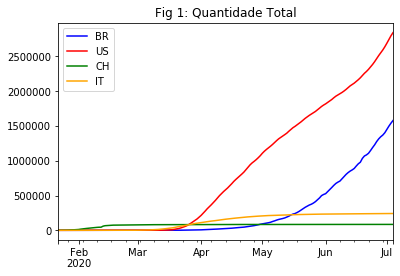

In [19]:
ax = plt.gca()


tsBr.plot(kind='line',x='Data',y='Qtd', color='Blue', ax=ax)
tsUs.plot(kind='line',x='Data',y='Qtd', color='Red', ax=ax)
tsCh.plot(kind='line',x='Data',y='Qtd', color='Green', ax=ax)
tsIt.plot(kind='line',x='Data',y='Qtd', color='Orange', ax=ax)
ax.legend(['BR','US','CH','IT'])

plt.title('Fig 1: Quantidade Total')
plt.show()

Bom, até aqui fizemos o básico:  
 - Um gráfico linear com a quantidade em relação ao tempo.  

Mais na frente vamos trabalhar esses dois parâmetros para melhorar a interpretação dos dados.  

Agora vamos mudar um pouco: mudar a escala da quantidade de casos confirmados.  

Mas, primeiro veja a figura acima **'Fig 1: Quantidade Total'** e responda a pergunta:  
_**Qual país parece que vai liderar ou despontar em casos confirmados?**_  
Realmente: a linha vermelha(US) aponta para cima mais que os outros, o que aparentemente sugere que ela será a dominante.

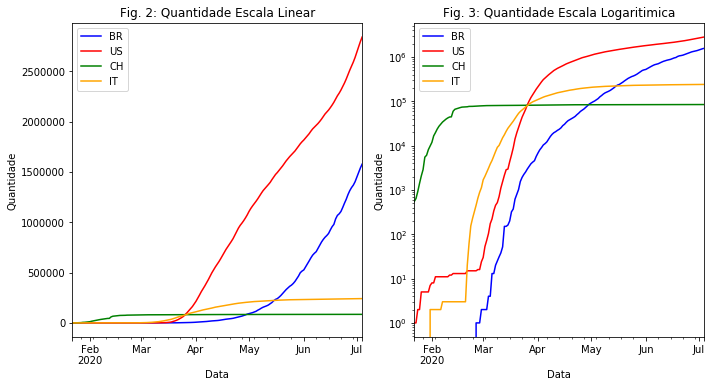

In [20]:
# multiplas figuras no mesmo plot:
plt.figure(figsize=(10,10))


plt.subplot(221)
ax = plt.gca()
tsBr.plot(kind='line',x='Data',y='Qtd', color='Blue', ax=ax)
tsUs.plot(kind='line',x='Data',y='Qtd', color='Red', ax=ax)
tsCh.plot(kind='line',x='Data',y='Qtd', color='Green', ax=ax)
tsIt.plot(kind='line',x='Data',y='Qtd', color='Orange', ax=ax)
ax.legend(['BR','US','CH','IT'])
plt.ylabel('Quantidade')
plt.xlabel('Data')
plt.title('Fig. 2: Quantidade Escala Linear')
plt.plot()

plt.subplot(222)
ax = plt.gca()
tsBr.plot(kind='line',x='Data',y='Qtd', color='Blue', ax=ax)
tsUs.plot(kind='line',x='Data',y='Qtd', color='Red', ax=ax)
tsCh.plot(kind='line',x='Data',y='Qtd', color='Green', ax=ax)
tsIt.plot(kind='line',x='Data',y='Qtd', color='Orange', ax=ax)
ax.legend(['BR','US','CH','IT'])
plt.yscale('log')
plt.ylabel('Quantidade')
plt.xlabel('Data')
plt.title('Fig. 3: Quantidade Escala Logaritimica')
plt.plot()


# plt.subplot(2)
# plt.yscale('log')
# plt.xscale('log')
# plt.plot()

plt.tight_layout()
plt.show()

Bom, e agora: _**Qual país parece que vai liderar ou despontar em casos confirmados?**_  

Vejamos a **Fig. 3: Quantidade Escala Logarítimica**:
 - A escala revela o comportamento padrão, e pelo menos até o momento, a curva de casos confirmados em azul apesar de menor se mostra mais inclinada que a vermelhar indicando um coeficiente maior e, portanto, um número futuro maior que a vermelha em algum momento no tempo.  

Outras análises serão feitas ainda.